In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from glob import glob
from sklearn.metrics import r2_score
from math import sqrt
from numpy import concatenate
import numpy as np
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import tree
from matplotlib import pyplot
from random import randint
from sklearn.metrics import mean_absolute_error
import math


In [35]:
df2016 = pd.read_csv (r'PSM_DesMoines,IA_2016.csv',index_col = False,skiprows=3, names = ['Year','Month','Day','Hour','Minute','DHI','DNI','GHI','Dew Point','Solar Zenith Angle','Wind Speed','Relative Humidity','Temperature','Pressure'
])
df2017 = pd.read_csv (r'PSM_DesMoines,IA_2017.csv',index_col = False,skiprows=3, names = ['Year','Month','Day','Hour','Minute','DHI','DNI','GHI','Dew Point','Solar Zenith Angle','Wind Speed','Relative Humidity','Temperature','Pressure'
])
df2018= pd.read_csv (r'PSM_DesMoines,IA_2018.csv',index_col = False,skiprows=3, names = ['Year','Month','Day','Hour','Minute','DHI','DNI','GHI','Dew Point','Solar Zenith Angle','Wind Speed','Relative Humidity','Temperature','Pressure'
])
dftraining= df2016.append([df2017,df2018])
dftraining.head()

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Dew Point,Solar Zenith Angle,Wind Speed,Relative Humidity,Temperature,Pressure
0,2016,1,1,0,0,0,0,0,-9.0,160.98,4.2,84.65,-7.0,980
1,2016,1,1,0,30,0,0,0,-9.0,161.24,3.9,84.65,-7.0,980
2,2016,1,1,1,0,0,0,0,-9.0,159.49,3.7,86.55,-8.0,980
3,2016,1,1,1,30,0,0,0,-9.0,156.17,3.8,86.55,-8.0,980
4,2016,1,1,2,0,0,0,0,-10.0,151.85,4.0,84.20,-8.0,980


In [5]:
dftesting = pd.read_csv (r'PSM_DesMoines,IA_2019.csv',index_col = False,skiprows=3, names = ['Year','Month','Day','Hour','Minute','DHI','DNI','GHI','Dew Point','Solar Zenith Angle','Wind Speed','Relative Humidity','Temperature','Pressure'
])

In [115]:
def combine_training_arrays(df, input_arry, output_arr):
    ghi  = df['GHI'].values
    temp  = df['Temperature'].values
    #cloud_cover = df['Cloud Cover'].values
    hours = df['Hour'].values
    minutes = df['Minute'].values
    solar_zenith = df['Solar Zenith Angle'].values
    pressure = df['Pressure'].values
    dhi = df['DHI'].values
    dni = df['DNI'].values
    #Sanity check, should all be 8760
    #assert len(pressure)==len(solar_zenith)==len(minutes)==len(hours)==len(ghi)==8760, "len of input array not 8760"
    ar = np.array([ ghi,hours, minutes, solar_zenith, pressure,temp]).T
    input_arry = np.concatenate((input_arry, ar))
    output_arr = np.concatenate((output_arr, np.array(dni).T))
    return input_arry, output_arr

In [116]:
input_size = 6
input_arry = np.array([]).reshape(0,input_size)
output_arry = np.array([])

input_arry, output_arry = combine_training_arrays(dftraining, input_arry, output_arry)

In [117]:
X_train = input_arry 
Y_train = output_arry

print(X_train.shape)
print(Y_train)

(52560, 6)
[0. 0. 0. ... 0. 0. 0.]


In [118]:
def create_testing_arrays(df, input_arry, output_arr):
    ghi  = df['GHI'].values
    temp  = df['Temperature'].values
    #cloud_cover = df['Cloud Cover'].values
    hours = df['Hour'].values
    minutes = df['Minute'].values
    solar_zenith = df['Solar Zenith Angle'].values
    pressure = df['Pressure'].values
    dhi = df['DHI'].values
    dni = df['DNI'].values
    #Sanity check, should all be 8760
    #assert len(pressure)==len(solar_zenith)==len(minutes)==len(hours)==len(ghi)==8760, "len of input array not 8760"
    ar = np.array([ ghi,hours, minutes, solar_zenith, pressure,temp]).T
    input_arry = np.concatenate((input_arry, ar))
    output_arr = np.concatenate((output_arr, np.array(dni).T))
    return input_arry, output_arr

In [119]:
input_size = 6
test_input_arry = np.array([]).reshape(0,input_size)
test_output_arry = np.array([])

test_input_arry, test_output_arry = create_testing_arrays(dftesting, test_input_arry, test_output_arry)

In [120]:
X_test=test_input_arry
y_test=test_output_arry

print(X_test.shape)
print(y_test.shape)

(17520, 6)
(17520,)


In [121]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
# design svm model
#clf = SVR()
clf = SVR(kernel='poly', C=50, gamma='scale')
# fit model
clf.fit(X_train,Y_train)

# make a prediction
predict_y = clf.predict(X_test)
#yhat = predict_y.reshape(predict_y.shape[0],1)
#test_X = test_X.reshape((test_X.shape[0],n_mins*n_features))
print(r2_score(y_test, predict_y))
MSE=mean_squared_error(y_test,predict_y) 
print('mean square error', MSE)


0.8991954139670137
mean square error 8795.656060346571


No handles with labels found to put in legend.


51.942406678654045


<AxesSubplot:xlabel='Time (months)', ylabel='DHI w/m^2'>

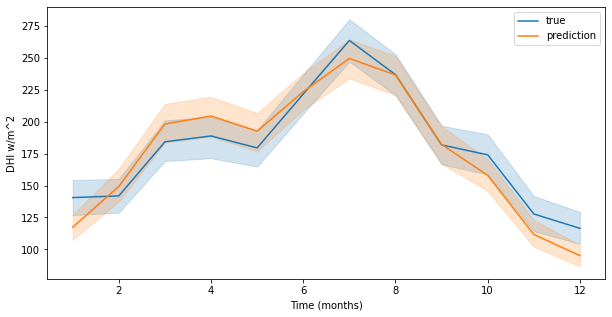

In [122]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, predict_y))
plt.figure(figsize=(10, 5))
#plt.plot(np.arange(0, len(Y_train)), Y_train, 'g', label="history")
# plt.plot(np.arange(len(y_test[0:1488])), y_test[0:1488], marker='', label="true")
# plt.plot(np.arange( len(y_test[0:1488])), predict_y[0:1488], 'y', label="prediction")
# # plt.plot(np.arange(len(y_test)), y_test, marker='.', label="true")
leg = plt.legend();

# print(np.mean(y_test[0:1488]))
# plt.plot(np.arange( len(y_test)), predict_y, 'y', label="prediction")
plt.ylabel('DHI w/m^2')
plt.xlabel('Time (months)')
sns.lineplot(x = dftesting.Month, y = y_test ,data = dftesting,label="true")
sns.lineplot(x = dftesting.Month, y = predict_y, data = dftesting,label="prediction")

In [51]:
print(y_test[120])

54.0


In [52]:
print(predict_y[120])

47.77111037728845


In [113]:
from sklearn.model_selection import GridSearchCV

In [114]:
def grid_search(x_train, y_train, parameters):

    print("Start grid searching ...")

    # parsing grid_search config
    num_of_folds = 3
#     gs_config = [{'kernel': [parameters['kernel']],
#                   'C': parameters['c_pool'],
#                   'gamma': parameters['gamma_pool']}]

    svr = SVR()
    clf = GridSearchCV(svr, parameters, cv=num_of_folds, \
            scoring='neg_mean_squared_error', n_jobs=6)
    clf.fit(x_train, y_train)

    print("The best parameters set found on development set: {}"\
            .format(clf.best_params_))
    print("The correspnding score is {}".format(clf.best_score_))
    print("The best parameters set found on development set: {}"\
            .format(clf.best_params_))
    print("The correspnding score is {}".format(clf.best_score_))

#     logging.info("Saving the best model on disk ...")
#     utl.save_model(clf.best_estimator_, parameters['name'] + '-grid-search')

    return clf

In [115]:
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
 
param2 = dict(kernel=kernel,C=C,gamma=gamma)

grid_search(X_train, Y_train,param2)

Start grid searching ...
The best parameters set found on development set: {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
The correspnding score is -48.575922346355924
The best parameters set found on development set: {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
The correspnding score is -48.575922346355924


GridSearchCV(cv=3, estimator=SVR(), n_jobs=6,
             param_grid={'C': [50, 10, 1.0, 0.1, 0.01], 'gamma': ['scale'],
                         'kernel': ['poly', 'rbf', 'sigmoid']},
             scoring='neg_mean_squared_error')

In [80]:
i = randint(0,8760)
print("index is ",i)

print("Actual ",y_test[i]," ","Predicted ", predict_y[i])

index is  6636
Actual  29.0   Predicted  19.798466037377747


In [ ]:
print(mean_absolute_error(y_test,predict_y))

In [ ]:
predict_y.shape
y_test.shape

In [147]:
def MAPE(y,yhat):
    d = 0
    for i in range(len(y)):
        d = d + abs(y[i]-yhat[i])/y[i]
    return (100*d)/len(y)